## 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

The primary difference between Simple Linear Regression and Multiple Linear Regression lies in the number of independent variables used to predict the dependent variable.

Simple Linear Regression involves just one independent variable and models the relationship with the dependent variable as a straight line.

Multiple Linear Regression includes two or more independent variables to explain the dependent variable.

#### Benefits of Multiple Linear Regression over Simple Linear Regression:

Increased Predictive Power: Multiple predictors provide a more detailed model, often leading to higher accuracy in predictions compared to using just one variable.

Ability to Assess Relationships: It allows us to assess the effect of each independent variable on the dependent variable while controlling for other variables, which is essential when variables are interrelated.

Multifactorial Understanding: Many real-world outcomes depend on several factors; thus, multiple linear regression provides a closer reflection of complex situations.

Reduced Error and Better Fit: Adding relevant variables often reduces the error term, as more variance in the dependent variable can be explained.

## 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

#### Outcome Variable (Y): 
The outcome we are trying to predict is sales (the revenue or number of products sold due to advertising).
#### Predictor Variables:
#### TV Advertising Budget (X1):
The amount spent on TV ads.
#### Online Advertising Budget (X2): 
The amount spent on online ads.

An interaction effect means that the effectiveness of one predictor (e.g., TV advertising) depends on the level of the other predictor (e.g., online advertising). In this case, the interaction might arise because:

The combined effect of advertising on TV and online could be different than the sum of their individual effects (synergy between TV and online advertising).

In a model without interaction, each advertising budget has an independent, additive effect on sales:

                                       Y = β0 + β1X1 + β2X2 + ϵ
                                       
Y is the sales outcome,
β0 is the intercept (baseline sales without any advertising),
β1 and β2 represent the independent effects of TV and online advertising budgets, respectively, on sales.

In a model with interaction, we account for the possibility that the effect of one advertising type depends on the other:

                                      Y = β0 + β1X1 + β2X2 + β3(X1 x X2) ϵ
                                      
β3 represents the interaction effect between TV and online advertising budgets.
X1 × X2 is the interaction term, capturing how the effect of TV advertising changes when the online advertising budget changes and vice versa.

Without Interaction: The predictions only consider each budget's independent effects on sales. This means that increasing one budget always increases sales by a fixed amount, regardless of the other budget.


With Interaction: The predictions allow for the possibility that increasing one budget’s effect on sales may depend on the level of the other budget. For example, a large online advertising budget might amplify the effect of the TV advertising budget, or vice versa, resulting in different predictions compared to the additive model.

## 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np

In [12]:
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url, low_memory=False)

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11431 entries, 0 to 11430
Columns: 1794 entries, UNIQUE_id to REMOVE_case
dtypes: bool(3), float64(264), int64(7), object(1520)
memory usage: 156.2+ MB


In [16]:
binary_cols = [col for col in df.columns if df[col].dtype in ['bool', 'int64'] and df[col].nunique() == 2]
print("Binary columns:", binary_cols)

Binary columns: ['SURVEY_finished', 'SURVEY_cohort_participant', 'SURVEY_orphan_cohort_response']


In [17]:
continuous_cols = [col for col in df.columns if df[col].dtype == 'float64']
print("Continuous columns:", continuous_cols[:10])

Continuous columns: ['DEMO_age', 'WELLNESS_life_satisfaction', 'GEO_housing_live_with_partner', 'GEO_housing_live_with_children', 'GEO_housing_live_with_grandkids', 'GEO_housing_live_with_parent', 'GEO_housing_live_with_in_laws', 'GEO_housing_live_with_siblings', 'GEO_housing_live_with_roommate', 'GEO_housing_live_with_other']


In [18]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:", categorical_cols[:10])

Categorical columns: ['UNIQUE_id', 'ELIGIBLE_consent', 'GEO_residence_canada', 'GEO_province', 'DEMO_gender', 'DEMO_identity_vetrans', 'DEMO_identity_indigenous', 'DEMO_identity_lgbtq', 'DEMO_identity_disability', 'DEMO_identity_bipoc']


In [25]:
# Drop one variable, e.g., 'DEMO_gender_binary', and try fitting the model again
additive_formula = 'SURVEY_finished ~ DEMO_age + WELLNESS_life_satisfaction + SURVEY_cohort_participant'

# Fit the simplified additive logistic regression model
try:
    additive_model = smf.logit(additive_formula, data=df).fit()
    print("Additive Model Summary:")
    print(additive_model.summary())
except np.linalg.LinAlgError:
    print("LinAlgError: Singular matrix, try removing other variables or check for multicollinearity.")

Optimization terminated successfully.
         Current function value: 0.509051
         Iterations 9
Additive Model Summary:
                           Logit Regression Results                           
Dep. Variable:        SURVEY_finished   No. Observations:                 8758
Model:                          Logit   Df Residuals:                     8754
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.02423
Time:                        23:38:43   Log-Likelihood:                -4458.3
converged:                       True   LL-Null:                       -4569.0
Covariance Type:            nonrobust   LLR p-value:                 9.977e-48
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             

In [26]:
# Add an interaction between 'DEMO_age' and 'SURVEY_cohort_participant'
interaction_formula = 'SURVEY_finished ~ DEMO_age * SURVEY_cohort_participant + WELLNESS_life_satisfaction'

# Fit the logistic regression model with interaction
interaction_model = smf.logit(interaction_formula, data=df).fit()
print("\nInteraction Model Summary:")
print(interaction_model.summary())


Optimization terminated successfully.
         Current function value: 0.508882
         Iterations 10

Interaction Model Summary:
                           Logit Regression Results                           
Dep. Variable:        SURVEY_finished   No. Observations:                 8758
Model:                          Logit   Df Residuals:                     8753
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.02455
Time:                        23:39:23   Log-Likelihood:                -4456.8
converged:                       True   LL-Null:                       -4569.0
Covariance Type:            nonrobust   LLR p-value:                 2.148e-47
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept      

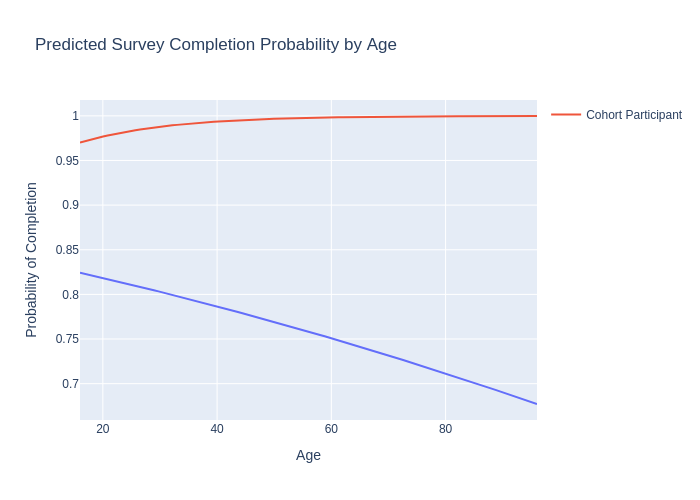

In [52]:
import numpy as np
import plotly.express as px

# Generate a range of values for age (100 points)
age_range = np.linspace(df['DEMO_age'].min(), df['DEMO_age'].max(), 100)

# Create DataFrame for predictions, duplicating each age value for both participant types
df_pred = pd.DataFrame({
    'DEMO_age': np.tile(age_range, 2),  # Repeat age_range twice, once for each cohort type
    'WELLNESS_life_satisfaction': df['WELLNESS_life_satisfaction'].mean(),  # Set at average
    'SURVEY_cohort_participant': [0]*100 + [1]*100  # First 100 are non-participants, next 100 are participants
})

# Predict probabilities for each row in df_pred using the interaction model
df_pred['predicted_prob'] = interaction_model.predict(df_pred)

# Separate data for plotting
df_pred_0 = df_pred[df_pred['SURVEY_cohort_participant'] == 0]
df_pred_1 = df_pred[df_pred['SURVEY_cohort_participant'] == 1]

# Plot predicted probabilities
fig = px.line(df_pred_0, x='DEMO_age', y='predicted_prob', title="Predicted Survey Completion Probability by Age",
              labels={'predicted_prob': 'Probability of Completion', 'DEMO_age': 'Age'}, line_shape='linear')
fig.add_scatter(x=df_pred_1['DEMO_age'], y=df_pred_1['predicted_prob'], mode='lines', name='Cohort Participant')
fig.update_traces(name='Non-Participant', selector=dict(name='linear'))
fig.show(renderer="png")


## 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [30]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        23:42:35   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The apparent contradiction arises because statistical significance of coefficients and explanatory power of the model (measured by R-squared) assess different aspects of the model's performance.

#### Understanding the Two Statements

"The model only explains 17.6% of the variability in the data":
This statement refers to the R-squared value of the model, which measures the proportion of the variability in the dependent variable (HP) that is explained by the independent variables (Sp. Def, Generation, and their interaction).
An R-squared of 17.6% means that about 82.4% of the variability in HP remains unexplained by the model, suggesting that there are other factors affecting HP that are not included in this model.


"Many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'":
This refers to the statistical significance and magnitude of the model’s coefficients. A large coefficient (e.g., greater than 10) implies that a one-unit change in that predictor (or category change, for categorical predictors) has a substantial effect on HP. Additionally, if the p-values are small (e.g., less than 0.05), it indicates strong evidence that the effect of that predictor is significantly different from zero.
#### Why This Happens

Low Explanatory Power:
The low R-squared indicates that while the model's predictors (Sp. Def, Generation, and their interaction) have statistically significant effects, they only capture a small portion of the variability in HP. This could mean that HP is influenced by other variables not included in this model (e.g., other stats or attributes of Pokémon) or by factors that are inherently random or unobservable.


Statistically Significant Coefficients:
The significance of coefficients is determined by how confidently we can conclude that each predictor has an effect, given the sample size and variability in the data. Even if the model doesn’t explain much of the overall variability, it can still identify that some predictors reliably influence HP within the scope of the data, resulting in significant coefficients.


#### Summary
The model can identify predictors with significant individual effects on HP even if it doesn’t explain most of the variability in HP. Essentially, significant predictors tell us there is an effect, but R-squared tells us how much of the effect in the dependent variable is captured by the model. Here, the predictors influence HP but are not sufficient to explain most of its variability.

## 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [32]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        23:50:30   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [34]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        23:51:00   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [35]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


### Cell 1: Data Preparation

Explanation:

Train-Test Split: This code prepares the dataset for modeling by splitting it into two equal parts (50/50 split) for training and testing. The train-test split is randomized with a set seed (130) for reproducibility.

Data Cleaning: Missing values in the Type 2 column are filled with "None" to ensure that all values are complete for modeling. 

This cell is important for setting up a robust evaluation framework. By training on one half and testing on the other, the models will be evaluated based on how well they generalize to unseen data.

### Cell 2: Model 3 Specification and Fitting

Explanation:

Model 3 Specification: This model (Model 3) is a linear regression model where HP is predicted by two independent variables: Attack and Defense.

Fitting Model 3: The model is trained on the pokeaman_train dataset. model3_fit.summary() provides a summary of the model’s performance and coefficients, which includes metrics like R-squared, coefficient estimates, and p-values for the predictors.

This cell demonstrates a simple linear regression model with two predictors, establishing a baseline for predicting HP using Attack and Defense.

### Cell 3: Model 3 Performance Evaluation

Explanation:

Predictions and R-squared Calculation:
In-sample R-squared: This is the R-squared for Model 3 on the training data (pokeaman_train). It indicates how well the model explains the variability of HP within the training dataset.

Out-of-sample R-squared: This is computed by comparing the predicted HP values (yhat_model3) against the actual HP values (y) in the test data (pokeaman_test). It indicates how well Model 3 generalizes to unseen data.

This cell is key to understanding how well Model 3 generalizes. If the out-of-sample R-squared is significantly lower than the in-sample R-squared, it suggests that Model 3 may be overfitting to the training data.

### Cell 4: Model 4 Specification and Fitting

Explanation:

Model 4 Specification: This model (Model 4) includes a large number of interaction terms among several variables (Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk). Interaction terms allow the model to capture more complex relationships among these variables.

Comment on Interaction Expansion: A warning is included in the code, noting that adding interactions among more categorical variables (Generation, Type 1, Type 2) would generate an extremely large number of combinations, leading to an infeasibly complex model.

This cell illustrates a more complex model with interaction terms, which aims to capture more nuanced relationships. However, it also highlights the risk of model complexity and computational limits when adding many interactions.

### Cell 5: Model 4 Performance Evaluation

Explanation:

In-sample and Out-of-sample R-squared: Similar to Model 3, this cell evaluates Model 4 by computing both in-sample and out-of-sample R-squared values. Comparing these two metrics helps assess Model 4’s generalization capability.

This evaluation demonstrates the impact of adding complexity to the model. Ideally, Model 4 should perform better than Model 3 if the interactions capture meaningful relationships. However, if the out-of-sample R-squared is much lower than the in-sample R-squared, it would suggest overfitting due to the complexity of interactions.

Summary of What This Code Illustrates

Model Complexity and Overfitting:
Model 3 is simpler, while Model 4 is much more complex due to the interactions. Comparing the in-sample and out-of-sample R-squared values allows us to observe the trade-off between simplicity and model complexity.

Importance of Train-Test Split for Generalization:
By evaluating the models on both training and testing data, the code illustrates the importance of generalization. Out-of-sample R-squared is a key metric for understanding how well each model performs on unseen data.

Effectiveness of Interaction Terms:
Model 4’s interaction terms aim to improve prediction by capturing complex relationships, but there’s a risk of overfitting. This example highlights the challenges of balancing complexity with predictive power.
This sequence of cells demonstrates the practical steps and considerations in developing and evaluating regression models, particularly the effects of adding complexity through interactions and the need for careful evaluation on both training and testing sets.

## 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

In [36]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


#### Key Concepts

Design Matrix (exog):
In regression models, the design matrix (model4_spec.exog) contains the values of all predictor variables, including main effects and interaction terms. The linear form (model4_linear_form) specifies interactions among variables, leading to many new columns in this matrix, representing each interaction.
Each interaction term creates a new predictor that combines two or more original variables, which can increase the size and complexity of the design matrix significantly.

Multicollinearity:
Multicollinearity occurs when predictor variables (or combinations of predictors, like interactions) are highly correlated with each other. This is common when we add interaction terms, especially among highly related variables (e.g., Attack, Defense, Speed).
High multicollinearity can lead to unstable coefficient estimates and inflated standard errors, which undermines the model’s reliability and its ability to generalize well to new data.

Condition Number:
The condition number (Cond. No.) quantifies the level of multicollinearity in the design matrix. A high condition number indicates severe multicollinearity, which makes the matrix "ill-conditioned" and the model less stable. 

Generally:
Low Condition Number (< 30): Good; minimal multicollinearity.
Moderate Condition Number (< 1000): Acceptable but requires caution.
High Condition Number (> 1000): Indicates multicollinearity and potential issues with out-of-sample prediction.
The condition number for Model 4 is extremely high (12 trillion in one case), reflecting severe multicollinearity due to the large number of interaction terms.

Centering and Scaling:
Centering (subtracting the mean) and scaling (dividing by the standard deviation) of predictors reduces multicollinearity by aligning predictors to have a mean of zero and a unit variance.
In Model 3, centering and scaling reduce the condition number from 343 to 1.66, which dramatically improves the stability of the model. However, even after centering and scaling, Model 4's condition number remains extremely high (over 2 quadrillion) due to the vast number of interaction terms.

#### Why Multicollinearity Affects Out-of-Sample Generalization

In-Sample vs. Out-of-Sample: Multicollinearity impacts a model's out-of-sample performance because it leads to overfitting on the training data. The model picks up noise or minor variations that are specific to the training set, resulting in highly unstable coefficient estimates. This instability prevents the model from generalizing well to new data.

High Condition Number and Prediction Instability: When the condition number is high, the slightest change in data (e.g., between training and test sets) can lead to disproportionately large changes in predicted values. This results in poor out-of-sample predictions, as seen in Model 4’s low out-of-sample R-squared despite a high in-sample R-squared.

#### Concise Explanation

The linear form for model4 creates a design matrix with many interaction terms, leading to high multicollinearity, as shown by the extremely high condition number. This multicollinearity makes coefficient estimates unstable and prone to overfitting, causing the model to perform well on the training data but poorly on new data. Although centering and scaling reduce multicollinearity in simpler models, they are insufficient to address the extreme multicollinearity in a model with excessive interaction terms, like Model 4. This results in a lack of generalization and poor out-of-sample performance.

## 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

In [37]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


#### Model Evolution and Development

Model 5 (model5_linear_form):
Starting Point: Expands from the simpler model3_fit and model4_fit, which used only a few predictors, to include more main effects like Speed, Sp. Def, Sp. Atk, and categorical variables (Generation, Type 1, Type 2).
Rationale: By adding more predictors, especially main effects without interactions, Model 5 aims to capture more variation in HP without introducing overwhelming complexity.
Outcome: This model strikes a balance between interpretability and accuracy by including main effects that likely influence HP.

Model 6 (model6_linear_form):
Extension from Model 5: Rather than including all categorical levels for Generation and Type 1, Model 6 selectively includes only the significant levels identified in Model 5 (e.g., Generation 2, Generation 5, Type 1 == "Normal", Type 1 == "Water").
Rationale: This selective inclusion approach reduces the model’s complexity and potentially mitigates multicollinearity by focusing on levels that show significant effects. It avoids the unnecessary complexity of including all levels.
Outcome: Model 6 improves predictive stability by focusing on relevant indicators, which should enhance generalization without overfitting.

Model 7 (model7_linear_form):
Further Development: Adds interaction terms among continuous variables (Attack, Speed, Sp. Def, Sp. Atk) while retaining the selected significant categorical levels from Model 6.
Rationale: Interaction terms allow Model 7 to capture complex relationships among continuous predictors, which may improve in-sample predictive accuracy. However, these interactions also risk increasing multicollinearity, as shown by the high condition number.

Outcome: While interaction terms might improve in-sample predictions, they introduce multicollinearity, leading to potential overfitting.
Model 7 with Centering and Scaling (model7_linear_form_CS):
Modification of Model 7: Applies centering and scaling to continuous predictors (Attack, Speed, Sp. Def, Sp. Atk), which stabilizes the model by reducing multicollinearity.
Rationale: Centering and scaling address multicollinearity without removing interactions. This approach lowers the condition number, making Model 7’s estimates more stable and potentially enhancing out-of-sample predictions.
Outcome: The condition number is drastically improved, reflecting greater model stability, which is likely to improve generalizability.

## 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

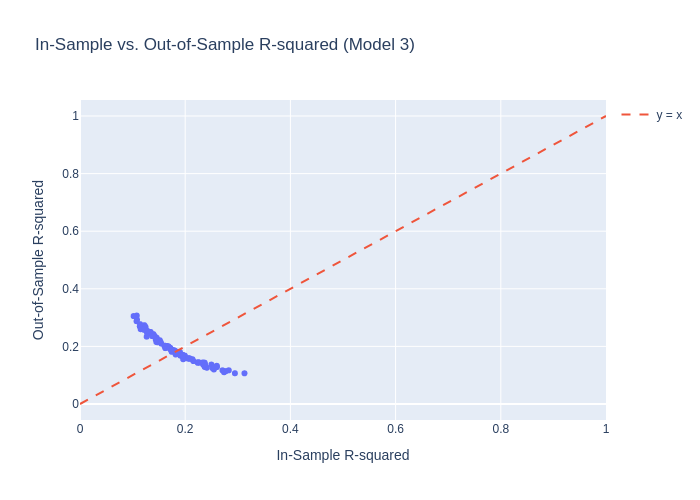

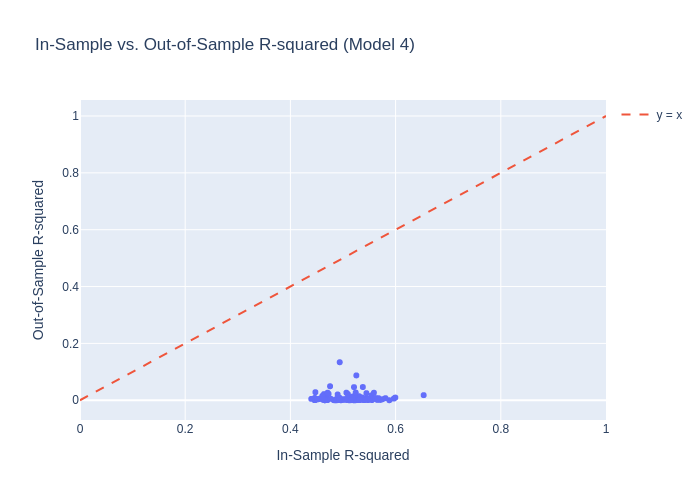

In [51]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

# Assuming `pokeaman` DataFrame is already loaded and cleaned
# Define number of iterations
reps = 100
in_sample_Rsquared_model3 = np.zeros(reps)
out_of_sample_Rsquared_model3 = np.zeros(reps)
in_sample_Rsquared_model4 = np.zeros(reps)
out_of_sample_Rsquared_model4 = np.zeros(reps)

# Model specifications
model3_formula = 'HP ~ Attack + Defense'
model4_formula = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'

# Perform multiple iterations with different train-test splits
for i in range(reps):
    # Randomly split the data each iteration without setting a seed
    train_data, test_data = train_test_split(pokeaman, train_size=0.5)
    
    # Fit Model 3 on the training data
    model3_fit = smf.ols(formula=model3_formula, data=train_data).fit()
    # Calculate in-sample and out-of-sample R-squared for Model 3
    in_sample_Rsquared_model3[i] = model3_fit.rsquared
    predictions_model3 = model3_fit.predict(test_data)
    out_of_sample_Rsquared_model3[i] = np.corrcoef(test_data['HP'], predictions_model3)[0, 1]**2
    
    # Fit Model 4 on the training data
    model4_fit = smf.ols(formula=model4_formula, data=train_data).fit()
    # Calculate in-sample and out-of-sample R-squared for Model 4
    in_sample_Rsquared_model4[i] = model4_fit.rsquared
    predictions_model4 = model4_fit.predict(test_data)
    out_of_sample_Rsquared_model4[i] = np.corrcoef(test_data['HP'], predictions_model4)[0, 1]**2

# Create DataFrame for visualization
results_df = pd.DataFrame({
    "In Sample R-squared (Model 3)": in_sample_Rsquared_model3,
    "Out of Sample R-squared (Model 3)": out_of_sample_Rsquared_model3,
    "In Sample R-squared (Model 4)": in_sample_Rsquared_model4,
    "Out of Sample R-squared (Model 4)": out_of_sample_Rsquared_model4
})

# Visualize Model 3 performance
fig1 = px.scatter(results_df, x="In Sample R-squared (Model 3)", y="Out of Sample R-squared (Model 3)",
                  title="In-Sample vs. Out-of-Sample R-squared (Model 3)",
                  labels={"In Sample R-squared (Model 3)": "In-Sample R-squared",
                          "Out of Sample R-squared (Model 3)": "Out-of-Sample R-squared"})
fig1.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", name="y = x", line=dict(dash="dash")))
fig1.show(renderer="png")

# Visualize Model 4 performance
fig2 = px.scatter(results_df, x="In Sample R-squared (Model 4)", y="Out of Sample R-squared (Model 4)",
                  title="In-Sample vs. Out-of-Sample R-squared (Model 4)",
                  labels={"In Sample R-squared (Model 4)": "In-Sample R-squared",
                          "Out of Sample R-squared (Model 4)": "Out-of-Sample R-squared"})
fig2.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", name="y = x", line=dict(dash="dash")))
fig2.show(renderer="png")

## 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

In [47]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [48]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [49]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [50]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


Training Models on Specific Generations:
Generation 1 Model (gen1_predict_future): A model (model7 or model6) is trained only on Generation 1 Pokémon.
Generations 1–5 Model (gen1to5_predict_future): The model is trained on Pokémon from Generations 1 to 5, excluding Generation 6.

Evaluating "Future" Predictions:
Each model is first evaluated on its in-sample R-squared (how well it fits the data it was trained on).
Then, the model is tested on an "out-of-sample" basis by making predictions on data from different generations:
For gen1_predict_future, predictions are made on Generations 2–6.
For gen1to5_predict_future, predictions are made on Generation 6 Pokémon.

Comparing to the Original Model:
The original models (model7 and model6) are evaluated on a separate test set (split from the entire dataset) to provide a baseline for comparison.
The original model's performance on this test set is compared to the out-of-sample predictions of the generation-specific models.

#### Interpretation of Results

In-Sample R-squared vs. Out-of-Sample R-squared:
If the in-sample R-squared values for the generation-specific models are high, it indicates that the model explains the variability within its training data well.
If the out-of-sample R-squared values are significantly lower, this suggests the model struggles to generalize to newer generations, indicating a potential lack of generalization.

Purpose of this Demonstration:
This test checks how well a model trained on earlier generations of data performs when predicting outcomes for later generations. If the out-of-sample R-squared is low, it suggests that newer generations may have different relationships between features, making it harder for models trained on older data to generalize.
Real-World Implication: This type of analysis is useful when examining whether historical data (e.g., older generations) can reliably predict future or unseen data (e.g., new generations or new categories). If future data differs in meaningful ways, the model's predictive power will diminish, highlighting the need for models that can adapt to changes over time.

### Summary
In this illustration, models trained on earlier generations are tested on later generations to assess generalization. Higher in-sample R-squared but lower out-of-sample R-squared for these models indicates that data from earlier generations may not capture all relevant patterns for future generations, showing limitations in predicting trends over time or across evolving data sets.

# ChatBot Summary

Summary of Interaction with ChatGPT on Model Evaluation and Generalization
In this interaction, we explored various aspects of regression model evaluation, focusing on model generalization and the impact of training on specific data subsets. Here’s a breakdown of the key insights and code developments:

Model Development and Complexity:
We examined a series of models (model3, model4, model5, etc.), incrementally adding predictors and interaction terms to improve predictive power. We observed that while additional terms increased in-sample R-squared, they often led to overfitting, reducing out-of-sample performance and increasing multicollinearity, as indicated by high condition numbers.
In-Sample vs. Out-of-Sample Performance Evaluation:
To test model generalization, we used a for-loop to create multiple train-test splits without a fixed random seed, gathering in-sample and out-of-sample R-squared values over 100 iterations. This approach visualized the variability in model performance, showing if the model tended to overfit (higher in-sample R-squared than out-of-sample) or if it generalized well across splits.
Generational Training and "Future" Prediction:
We trained models on data subsets representing Pokémon from specific generations to examine how well these models could predict data from future generations. This exercise revealed that models trained on early generations had high in-sample R-squared but often low out-of-sample R-squared when predicting later generations, indicating potential limitations in generalizability over time.
Purpose of the Analysis:
The analyses highlighted the challenges of model generalization, especially with evolving data, and the need for careful evaluation of both in-sample and out-of-sample performance. This is essential in assessing model robustness and adaptability to new or unseen data.
This series of exercises provided practical insights into balancing model complexity, evaluating predictive performance, and understanding generalization limits in regression modeling. The code and visualizations generated offered a structured way to test model stability and predictive accuracy across diverse data samples.


https://chatgpt.com/share/67369558-59b8-8000-a7d3-29af215b68d8